# Face Recognition (LFW Dataset)

In a previous lab we used an multi-layer perceptron NN to build a face recognition model for some famous faces. Now let's see how a CNN does

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60, resize=1)

I'm deliberately picking faces.images over faces.data here due to the shape. 

In [3]:
X = faces.images
y = faces.target
X[0]

array([[0.5254902 , 0.5176471 , 0.5058824 , ..., 0.25882354, 0.25882354,
        0.25490198],
       [0.5385621 , 0.5424837 , 0.54901963, ..., 0.2653595 , 0.26143792,
        0.25882354],
       [0.5542484 , 0.5660131 , 0.5660131 , ..., 0.2627451 , 0.26143792,
        0.2640523 ],
       ...,
       [0.25620916, 0.52679735, 0.71895427, ..., 0.00653595, 0.00653595,
        0.        ],
       [0.19738562, 0.44183007, 0.6640523 , ..., 0.00653595, 0.00261438,
        0.        ],
       [0.1267974 , 0.34640524, 0.56993467, ..., 0.00653595, 0.00261438,
        0.        ]], dtype=float32)

All values are between 0 and 1 so greyscale. No need to do any /255 like we did in the digits dataset

In [4]:
y

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

## Important

Always look at the y vector. These are labels from 0 to 7. This means we need SparseCategoricalCrossentropy 

In [5]:
numberofclasses = np.unique(y).size
numberofclasses

8

In [6]:
X.shape

(1348, 125, 94)

So we have 8 different people to train our model on and 1348 total images. The image resolution is 125x94


First step set the Input shape, then we should normalise the data between 0 and 1

However faces dataset is already between 0 and 1 so this rescaling is not needed

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(125, 94, 1)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(numberofclasses, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 94, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 47, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 23, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 11, 64)        0

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  #from_logits=False as softmax is on the output of the CNN
    metrics=['accuracy'],
)

In [11]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
26/26 [==============================] - 7s 184ms/step - loss: 1.8506 - accuracy: 0.3700 - val_loss: 1.8031 - val_accuracy: 0.3744
Epoch 2/25
26/26 [==============================] - 4s 164ms/step - loss: 1.7672 - accuracy: 0.3911 - val_loss: 1.7548 - val_accuracy: 0.3744
Epoch 3/25
26/26 [==============================] - 4s 167ms/step - loss: 1.6100 - accuracy: 0.4134 - val_loss: 1.4168 - val_accuracy: 0.4483
Epoch 4/25
26/26 [==============================] - 5s 178ms/step - loss: 1.1821 - accuracy: 0.5631 - val_loss: 1.0889 - val_accuracy: 0.6059
Epoch 5/25
26/26 [==============================] - 5s 192ms/step - loss: 0.7027 - accuracy: 0.7611 - val_loss: 0.9204 - val_accuracy: 0.7340
Epoch 6/25
26/26 [==============================] - 5s 174ms/step - loss: 0.4849 - accuracy: 0.8453 - val_loss: 0.6761 - val_accuracy: 0.7980
Epoch 7/25
26/26 [==============================] - 5s 187ms/step - loss: 0.3112 - accuracy: 0.9072 - val_loss: 0.4969 - val_accuracy: 0.8571
Epoch 

Look at that training accuracy and loss! 100% and loss so small it needs to use scientific notation.

There is still some overfitting as val_accuracy and loss are "only" high 80s. This is better than ANN anyway

In [12]:
model.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 1s 69ms/step - loss: 0.7221 - accuracy: 0.8754


{'loss': 0.7221399545669556, 'accuracy': 0.8753709197044373}

I got 87.5% accuracy which was better than previous ANN. Let's plot

In [13]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

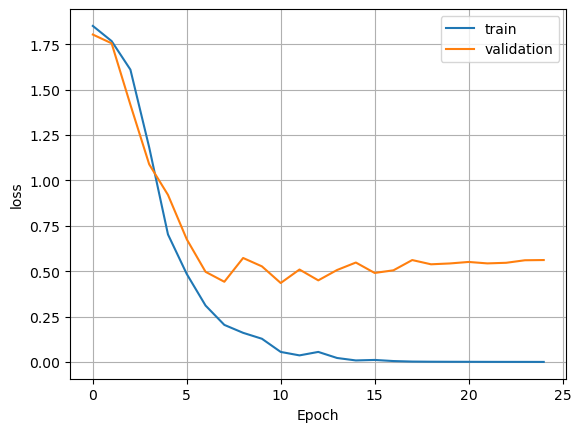

In [14]:
plot_loss(history)

In [15]:
X_train[0].shape

(125, 94)

Let's revisit model and see if we can get rid of some of the overfitting

What are the things we can try
1) Data Augmentation
2) Regularisation (I haven't done this below)
3) Dropout

In [16]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [17]:
model2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(125, 94, 1)),
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(numberofclasses, activation='softmax')])

We could do early stopping too

In [18]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [20]:
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 15s 368ms/step - loss: 1.8647 - accuracy: 0.3725 - val_loss: 1.8254 - val_accuracy: 0.3744
Epoch 2/100
26/26 [==============================] - 8s 303ms/step - loss: 1.8099 - accuracy: 0.3911 - val_loss: 1.8647 - val_accuracy: 0.3744
Epoch 3/100
26/26 [==============================] - 6s 241ms/step - loss: 1.8142 - accuracy: 0.3911 - val_loss: 1.8459 - val_accuracy: 0.3744
Epoch 4/100
26/26 [==============================] - 8s 311ms/step - loss: 1.8021 - accuracy: 0.3911 - val_loss: 1.8077 - val_accuracy: 0.3744
Epoch 5/100
26/26 [==============================] - 8s 293ms/step - loss: 1.8032 - accuracy: 0.3911 - val_loss: 1.8440 - val_accuracy: 0.3744
Epoch 6/100
26/26 [==============================] - 8s 301ms/step - loss: 1.7995 - accuracy: 0.3911 - val_loss: 1.8158 - val_accuracy: 0.3744
Epoch 7/100
26/26 [==============================] - 8s 296ms/step - loss: 1.7798 - accuracy: 0.3923 - val_loss: 1.8191 - val_accuracy: 0.374

Maybe too much attempting to regularise as it was not as good as the previous

In [21]:
history.history['val_loss'][-5:]

[0.5167811512947083,
 0.435343861579895,
 0.4613904654979706,
 0.43923431634902954,
 0.459115207195282]

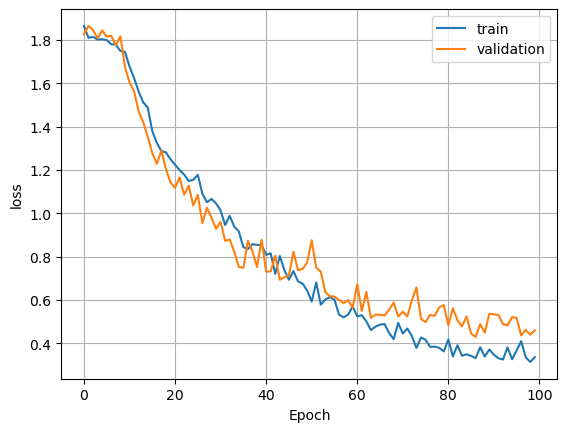

In [22]:
plot_loss(history)

In [23]:
model2.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 1s 59ms/step - loss: 0.6060 - accuracy: 0.8398


{'loss': 0.6060242056846619, 'accuracy': 0.8397626280784607}

Let's try once more - less data augmentation and dropout set to 0.1 only this time.

In [24]:
data_augmentation_layers = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [25]:
model3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(125, 94, 1)),
    data_augmentation_layers,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(numberofclasses, activation='softmax')])

In [26]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [27]:
history = model3.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 12s 313ms/step - loss: 1.8367 - accuracy: 0.3800 - val_loss: 1.7975 - val_accuracy: 0.3744
Epoch 2/50
26/26 [==============================] - 6s 245ms/step - loss: 1.8118 - accuracy: 0.3911 - val_loss: 1.8392 - val_accuracy: 0.3744
Epoch 3/50
26/26 [==============================] - 7s 255ms/step - loss: 1.7956 - accuracy: 0.3911 - val_loss: 1.8306 - val_accuracy: 0.3744
Epoch 4/50
26/26 [==============================] - 7s 263ms/step - loss: 1.7817 - accuracy: 0.3948 - val_loss: 1.7872 - val_accuracy: 0.3744
Epoch 5/50
26/26 [==============================] - 6s 220ms/step - loss: 1.7293 - accuracy: 0.4010 - val_loss: 1.7083 - val_accuracy: 0.3941
Epoch 6/50
26/26 [==============================] - 7s 258ms/step - loss: 1.5964 - accuracy: 0.4381 - val_loss: 1.5409 - val_accuracy: 0.4384
Epoch 7/50
26/26 [==============================] - 5s 208ms/step - loss: 1.4434 - accuracy: 0.4790 - val_loss: 1.4353 - val_accuracy: 0.4975
Epoch

Maybe a few more epochs

In [28]:
model3.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 8s 308ms/step - loss: 0.1124 - accuracy: 0.9567 - val_loss: 0.5288 - val_accuracy: 0.8621
Epoch 2/20
26/26 [==============================] - 7s 278ms/step - loss: 0.1132 - accuracy: 0.9592 - val_loss: 0.4774 - val_accuracy: 0.9113
Epoch 3/20
26/26 [==============================] - 6s 234ms/step - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.5110 - val_accuracy: 0.8867
Epoch 4/20
26/26 [==============================] - 6s 222ms/step - loss: 0.0903 - accuracy: 0.9728 - val_loss: 0.5111 - val_accuracy: 0.8818
Epoch 5/20
26/26 [==============================] - 6s 223ms/step - loss: 0.0970 - accuracy: 0.9666 - val_loss: 0.4771 - val_accuracy: 0.8768
Epoch 6/20
26/26 [==============================] - 6s 220ms/step - loss: 0.1177 - accuracy: 0.9715 - val_loss: 0.4841 - val_accuracy: 0.8818
Epoch 7/20
26/26 [==============================] - 6s 243ms/step - loss: 0.0943 - accuracy: 0.9715 - val_loss: 0.4962 - val_accuracy: 0.8621
Epoch 

In [29]:
model3.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 1s 51ms/step - loss: 0.8948 - accuracy: 0.8427


{'loss': 0.8947827219963074, 'accuracy': 0.8427299857139587}

.8867 validation accuracy the highest so far I think (in the first attempted method), although there was higher in earlier epochs above (your numbers will vary), also a lower val_loss in the earlier epoch too. Can still try more things if you want. One thing I'm going to try is a different optimiser

In [30]:
model4 = tf.keras.models.Sequential([
tf.keras.Input(shape=(125, 94, 1)),
data_augmentation_layers,
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.1),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.1),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(numberofclasses, activation='softmax')])

In [31]:
model4.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [32]:
model4.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 9s 246ms/step - loss: 2.0144 - accuracy: 0.3329 - val_loss: 1.9766 - val_accuracy: 0.3744
Epoch 2/50
26/26 [==============================] - 5s 208ms/step - loss: 1.8322 - accuracy: 0.3911 - val_loss: 1.8659 - val_accuracy: 0.3744
Epoch 3/50
26/26 [==============================] - 6s 233ms/step - loss: 1.8144 - accuracy: 0.3911 - val_loss: 1.7932 - val_accuracy: 0.3744
Epoch 4/50
26/26 [==============================] - 5s 195ms/step - loss: 1.7992 - accuracy: 0.3911 - val_loss: 1.8838 - val_accuracy: 0.3744
Epoch 5/50
26/26 [==============================] - 5s 211ms/step - loss: 1.7907 - accuracy: 0.3911 - val_loss: 1.8355 - val_accuracy: 0.3744
Epoch 6/50
26/26 [==============================] - 5s 199ms/step - loss: 1.7849 - accuracy: 0.3936 - val_loss: 1.7930 - val_accuracy: 0.3744
Epoch 7/50
26/26 [==============================] - 5s 195ms/step - loss: 1.7599 - accuracy: 0.4059 - val_loss: 1.7929 - val_accuracy: 0.2709
Epoch 

In [33]:
model4.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
26/26 [==============================] - 7s 264ms/step - loss: 0.2079 - accuracy: 0.9233 - val_loss: 0.6102 - val_accuracy: 0.8325
Epoch 2/30
26/26 [==============================] - 7s 259ms/step - loss: 0.1800 - accuracy: 0.9369 - val_loss: 0.5427 - val_accuracy: 0.8719
Epoch 3/30
26/26 [==============================] - 7s 255ms/step - loss: 0.2315 - accuracy: 0.9245 - val_loss: 0.5694 - val_accuracy: 0.8424
Epoch 4/30
26/26 [==============================] - 7s 256ms/step - loss: 0.1757 - accuracy: 0.9394 - val_loss: 0.6933 - val_accuracy: 0.8473
Epoch 5/30
26/26 [==============================] - 7s 259ms/step - loss: 0.1858 - accuracy: 0.9332 - val_loss: 0.4476 - val_accuracy: 0.8818
Epoch 6/30
26/26 [==============================] - 7s 263ms/step - loss: 0.1468 - accuracy: 0.9530 - val_loss: 0.4033 - val_accuracy: 0.9064
Epoch 7/30
26/26 [==============================] - 7s 257ms/step - loss: 0.1555 - accuracy: 0.9455 - val_loss: 0.4922 - val_accuracy: 0.8670
Epoch 

Highest val accuracy so far, although the val_loss not the lowest, let's try test set

In [34]:
model4.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 1s 58ms/step - loss: 0.8511 - accuracy: 0.8783


{'loss': 0.8511373996734619, 'accuracy': 0.8783382773399353}

Best test accuracy score with rmsprop. There is still random chance in how your model is trained so there will be differences in the numbers when you run it yourself

In [35]:
model.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 0s 35ms/step - loss: 0.7221 - accuracy: 0.8754


{'loss': 0.7221399545669556, 'accuracy': 0.8753709197044373}

In [36]:
model2.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 0s 39ms/step - loss: 0.6060 - accuracy: 0.8398


{'loss': 0.6060242056846619, 'accuracy': 0.8397626280784607}

In [37]:
model3.evaluate(X_test, y_test, return_dict=True)

11/11 [==============================] - 0s 39ms/step - loss: 0.8948 - accuracy: 0.8427


{'loss': 0.8947827219963074, 'accuracy': 0.8427299857139587}